### Preparation - Review raw usage data

In [80]:
del df

In [2]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
from plot_helper import *

CSV_FILES = [
    '../data/MBO_Rev_Data_Apr2018.csv'
]

try:
    df
except NameError:
    df_list = []
    for csv in CSV_FILES:
        print('Start reading {}...'.format(csv),end='')
        df_ = pd.read_csv(csv,encoding="ISO-8859-1",parse_dates=['month'])
        print(' {:,} records found'.format(df_.shape[0]))
        df_list.append(df_)
    
    df = df_list[0] # pd.concat(df_list).drop_duplicates(subset=['Service Provider','Usage Period','SKU','Contract No'],keep='first')

    print(df.columns)

Start reading ../data/MBO_Rev_Data_Apr2018.csv... 5,557 records found
Index(['orderidpm', 'id', 'partnerrep2', 'partner_rep3', 'gamrep', 'orderdate',
       'detailtotal', 'DetailTotalConstantPlan', 'detailtotalUSD',
       'ConstantCurrency', 'detailtotalLC', 'product', 'geoTJ', 'channel',
       'bu', 'qtr', 'currency', 'platformgroup', 'platform', 'productgroup',
       'weekofqtr', 'orderid', 'enduserorganization', 'billtoorganization',
       'shiptoorganization', 'shiptoisocountrycode', 'partnerid', 'regiontj',
       'subregiontj', 'directrep', 'sirep', 'reseller', 'store_sku',
       'PointPlan', 'comments', 'CommentsFlag', 'Prepayment Calculations FLag',
       'source', 'month', 'enduserisocountrycode', 'RegionSegment', 'qty',
       'enteredby', 'vspp_rep', 'namrep', 'SnSMonths', 'VSPP_EXTERNAL_SKU',
       'class', 'enduserzip', 'ACV_INSTALLMENT_NUMBER', 'media',
       'DirectRep_CAM_SE'],
      dtype='object')


In [8]:
d

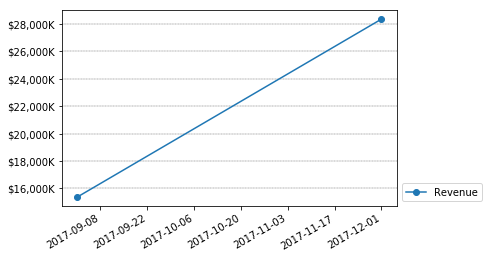

In [29]:
key_ts = 'month_first_day'
key_rev = 'detailtotal'

map_month = {8:9, 9:9, 10:9, 11:12, 12:12, 1:12}
df.loc[:,key_ts] = pd.Series(list(map(lambda m: datetime.date(2017,map_month[pd.to_datetime(m).month],1),df['month'].values)))

s_rev = df.groupby(key_ts)[key_rev].sum()

plt.plot(s_rev.index,s_rev.values,'o-',label='Revenue')

format_trend_chart()
plt.show()

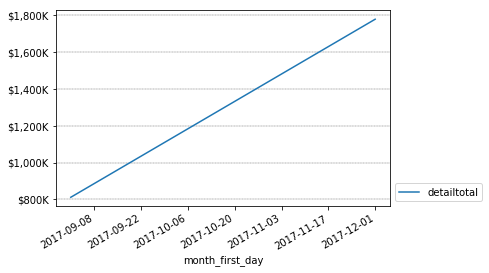

array(['NTT America',
       'Shanghai NTT Telecommunications Engineering Co., Ltd.',
       'NTTPC Communications,Inc.',
       'NTT Communications (Thailand) Co.,Ltd.', 'NTT America, Inc. SME',
       'NTT DATA INC', 'NTT DATA Inc.', 'NTT MSC Sdn Bhd',
       'NTT Communications Russia', 'NTT Singapore PTE Ltd',
       'NTT DATA CORPORATION',
       'NTT Com ICT Solutions (Australia) Pty Ltd', 'NTT Europe Ltd',
       'NTT DATA ITALIA SPA\t', 'NTT NEOMEIT Corporation',
       'NTT DATA KYUSHU Corporation', 'NTT Europe', 'NTT BizLink, Inc.',
       'NTT Com Asia Limited', 'NTT Communications Corporation',
       'NTT EUROPE ONLINE GMBH', 'PT. NTT Indonesia',
       'NTT SMARTCONNECT Corporation',
       'NTT Communications China Co., Ltd.',
       'NTT Communications Corporation New York Office',
       'NTT Communications Corporation London Office',
       'NTT Communications Corporation Frankfurt Office',
       'NTT Communications Corporation Paris Office',
       'NTT Communicatio

In [33]:
groupnames = [
    'NTT',
    'Fujitsu',
    ['FUJITSU','Fujitsu'],
    'Rackspace',
    'Virtustream',
    'IBM',
    ['SoftLayer','IBM'],
    ['Softlayer','IBM'],    
    'Tieto',
    'OVH',
    'KPN',
    ['Kpn','KPN'],
    ['SAVVIS','CenturyLink']
]

for g in groupnames:
    pat,group = None,None
    if isinstance(g,list):
        pat,group = g
    else:
        pat,group = g,g
    df.loc[df['reseller'].str.match(r'.*{}.*'.format(pat)),'Partner Group Name'] = group

df[(df['Partner Group Name']=='Fujitsu')&(df['reseller']!='NTT DATA Inc.')].groupby(key_ts)[key_rev].sum().plot()
format_trend_chart()
plt.show()

df[df['Partner Group Name']=='NTT']['reseller'].unique()


### Showcase Partner - Group Companies Revenue Trend

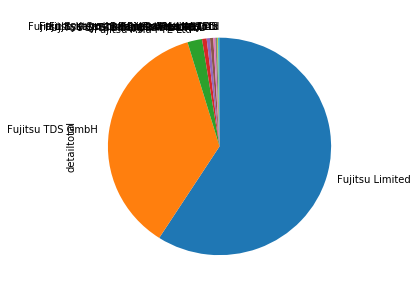

Service Provider | GEO | Total Revenue | Ratio | Last Revenue
:---|---|---|---|---
Fujitsu Limited||\$ 1,050,151|59.1 %|\$ 1,050,151
Fujitsu TDS GmbH||\$ 645,002|36.3 %|\$ 645,002
Fujitsu Asia PTE Ltd||\$ 37,631|2.1 %|\$ 37,631
FUJITSU DO BRASIL LTDA||\$ 11,791|0.7 %|\$ 11,791
FUJITSU SYSTEMS WEST LIMITED||\$ 8,625|0.5 %|\$ 8,625
Fujitsu Caribbean (Trinidad) Ltd.||\$ 8,402|0.5 %|\$ 8,402
Fujitsu America Inc||\$ 5,073|0.3 %|\$ 5,073
Fujitsu Kagoshima Infornet LIMITED||\$ 4,639|0.3 %|\$ 4,639
Fujitsu Norway AS||\$ 2,626|0.1 %|\$ 2,626
Fujitsu Vietnam Ltd||\$ 2,193|0.1 %|\$ 2,193
Fujitsu Systems Business Thailand Ltd||\$ 1,258|0.1 %|\$ 1,258

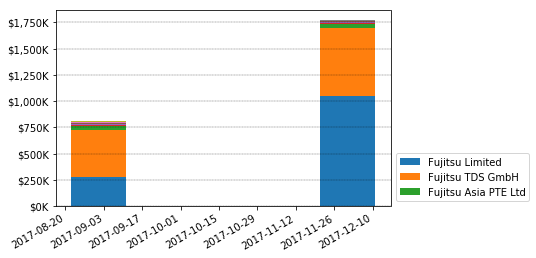

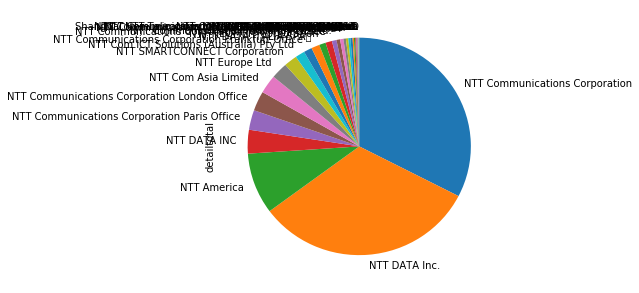

Service Provider | GEO | Total Revenue | Ratio | Last Revenue
:---|---|---|---|---
NTT Communications Corporation||\$ 897,651|32.6 %|\$ 897,651
NTT DATA Inc.||\$ 890,456|32.3 %|\$ 890,456
NTT America||\$ 250,515|9.1 %|\$ 250,515
NTT DATA INC||\$ 97,111|3.5 %|\$ 97,111
NTT Communications Corporation Paris Office||\$ 80,899|2.9 %|\$ 80,899
NTT Communications Corporation London Office||\$ 80,555|2.9 %|\$ 80,555
NTT Com Asia Limited||\$ 75,819|2.7 %|\$ 75,819
NTT Europe Ltd||\$ 66,702|2.4 %|\$ 66,702
NTT SMARTCONNECT Corporation||\$ 52,680|1.9 %|\$ 52,680
NTT Com ICT Solutions (Australia) Pty Ltd||\$ 38,061|1.4 %|\$ 38,061
NTT Communications Corporation Frankfurt Office||\$ 33,140|1.2 %|\$ 33,140
NTT DATA ITALIA SPA	||\$ 32,975|1.2 %|\$ 32,975
NTT NEOMEIT Corporation||\$ 26,026|0.9 %|\$ 26,026
NTT Communications Corporation New York Office||\$ 26,004|0.9 %|\$ 26,004
NTT Communications (Thailand) Co.,Ltd.||\$ 18,192|0.7 %|\$ 18,192
NTT Communications Russia||\$ 14,533|0.5 %|\$ 14,533
NTT America, Inc. SME||\$ 13,157|0.5 %|\$ 13,157
NTT Communications Corporation Bangkok Office||\$ 9,971|0.4 %|\$ 9,971
NTT EUROPE ONLINE GMBH||\$ 9,352|0.3 %|\$ 9,352
NTT Communications Corporation Barcelona Office||\$ 8,771|0.3 %|\$ 8,771
NTT Europe||\$ 8,352|0.3 %|\$ 8,352
NTT Communications Corporation Australia Office||\$ 5,333|0.2 %|\$ 5,333
NTT MSC Sdn Bhd||\$ 5,244|0.2 %|\$ 5,244
NTT Europe Limited||\$ 3,643|0.1 %|\$ 3,643
NTTPC Communications,Inc.||\$ 3,397|0.1 %|\$ 3,397
NTT BizLink, Inc.||\$ 2,365|0.1 %|\$ 2,365
NTT DATA CORPORATION||\$ 1,451|0.1 %|\$ 1,451
NTT DATA KYUSHU Corporation||\$ 1,370|0.0 %|\$ 1,370
NTT Communications China Co., Ltd.||\$ 1,328|0.0 %|\$ 1,328
PT. NTT Indonesia||\$ 1,048|0.0 %|\$ 1,048
NTT DATA Malaysia SDN BHD||\$ 783|0.0 %|\$ 783
Shanghai NTT Telecommunications Engineering Co., Ltd.||\$ 401|0.0 %|\$ 401

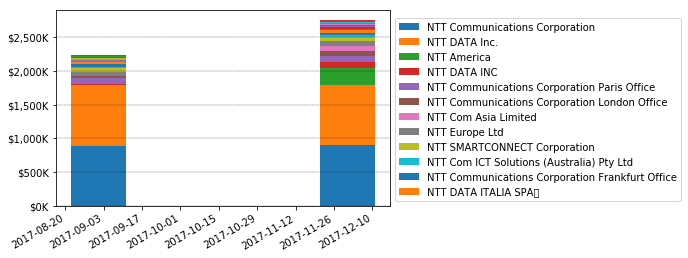

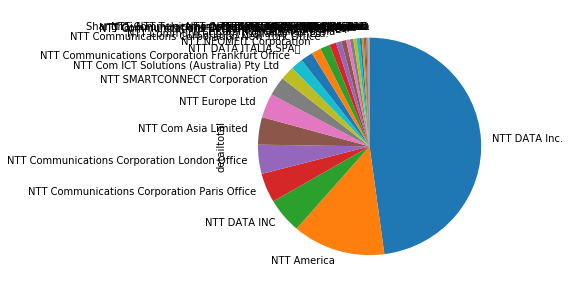

Service Provider | GEO | Total Revenue | Ratio | Last Revenue
:---|---|---|---|---
NTT DATA Inc.||\$ 890,456|47.9 %|\$ 890,456
NTT America||\$ 250,515|13.5 %|\$ 250,515
NTT DATA INC||\$ 97,111|5.2 %|\$ 97,111
NTT Communications Corporation Paris Office||\$ 80,899|4.4 %|\$ 80,899
NTT Communications Corporation London Office||\$ 80,555|4.3 %|\$ 80,555
NTT Com Asia Limited||\$ 75,819|4.1 %|\$ 75,819
NTT Europe Ltd||\$ 66,702|3.6 %|\$ 66,702
NTT SMARTCONNECT Corporation||\$ 52,680|2.8 %|\$ 52,680
NTT Com ICT Solutions (Australia) Pty Ltd||\$ 38,061|2.0 %|\$ 38,061
NTT Communications Corporation Frankfurt Office||\$ 33,140|1.8 %|\$ 33,140
NTT DATA ITALIA SPA	||\$ 32,975|1.8 %|\$ 32,975
NTT NEOMEIT Corporation||\$ 26,026|1.4 %|\$ 26,026
NTT Communications Corporation New York Office||\$ 26,004|1.4 %|\$ 26,004
NTT Communications (Thailand) Co.,Ltd.||\$ 18,192|1.0 %|\$ 18,192
NTT Communications Russia||\$ 14,533|0.8 %|\$ 14,533
NTT America, Inc. SME||\$ 13,157|0.7 %|\$ 13,157
NTT Communications Corporation Bangkok Office||\$ 9,971|0.5 %|\$ 9,971
NTT EUROPE ONLINE GMBH||\$ 9,352|0.5 %|\$ 9,352
NTT Communications Corporation Barcelona Office||\$ 8,771|0.5 %|\$ 8,771
NTT Europe||\$ 8,352|0.4 %|\$ 8,352
NTT Communications Corporation Australia Office||\$ 5,333|0.3 %|\$ 5,333
NTT MSC Sdn Bhd||\$ 5,244|0.3 %|\$ 5,244
NTT Europe Limited||\$ 3,643|0.2 %|\$ 3,643
NTTPC Communications,Inc.||\$ 3,397|0.2 %|\$ 3,397
NTT BizLink, Inc.||\$ 2,365|0.1 %|\$ 2,365
NTT DATA CORPORATION||\$ 1,451|0.1 %|\$ 1,451
NTT DATA KYUSHU Corporation||\$ 1,370|0.1 %|\$ 1,370
NTT Communications China Co., Ltd.||\$ 1,328|0.1 %|\$ 1,328
PT. NTT Indonesia||\$ 1,048|0.1 %|\$ 1,048
NTT DATA Malaysia SDN BHD||\$ 783|0.0 %|\$ 783
Shanghai NTT Telecommunications Engineering Co., Ltd.||\$ 401|0.0 %|\$ 401

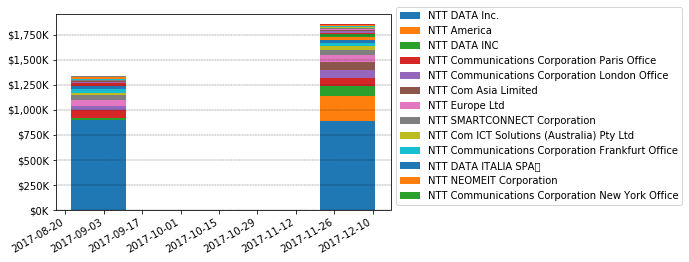

In [34]:
from IPython.display import HTML, Markdown, display
from defines import *

def plot_pie(series):
    series.plot.pie(startangle=90,counterclock=False)
    plt.gcf().set_size_inches(5,5)
    plt.show()      

def partner_snapshot(df_pg,key='Value (USD)',product_key='Product Group'):
    # sorted list by "key" size
    s_pg_sorted = df_pg[df_pg[key_ts] == END_MONTH].groupby('reseller')[key].sum().sort_values(ascending=False)

    # index list of entire usage period
    i_up = df_pg.groupby(key_ts)[key].sum().index

    # revenue distritbution pie chart
    plot_pie(s_pg_sorted)
   
    total_rev = s_pg_sorted.sum()
    prev_bar = 0
    rows = []
    for sp,rev in s_pg_sorted.items():
        df_sp = df_pg[df_pg['reseller'] == sp]
        sp_label = sp if rev/total_rev > 0.01 else ''
 
        rev_by_period = df_sp.groupby(key_ts)[key].sum() 
        for up in i_up:
            if not up in rev_by_period.keys():
                rev_by_period.at[up] = 0.0
        rev_by_period = rev_by_period.sort_index()
        rows.append([sp,'',
                     '\$ {:,.0f}'.format(rev),
                     '{:.1f} %'.format(rev/total_rev*100),
                     '\$ {:,.0f}'.format(rev_by_period.at[END_MONTH])])
 
        plt.bar(rev_by_period.index,rev_by_period.values,width=20,label=sp_label,bottom=prev_bar)
        prev_bar += rev_by_period.values
        
    display(Markdown("\n".join(['Service Provider | GEO | Total Revenue | Ratio | Last Revenue',
                                ':---|---|---|---|---',
                                "\n".join(map(lambda row: '|'.join(row),rows))])))   
    format_trend_chart()
    plt.show()


    
#for pg in df_top10.sort_values(by=['Revenue'],ascending=False)['Partner Group Name'].unique():
#    partner_snapshot(df[df['Partner Group Name'] == pg])

#partner_snapshot(df[(df['Partner Group Name'] == 'NTT')&(df['Product Group']!='Bundle')])
partner_snapshot(df[(df['Partner Group Name'] == 'Fujitsu')],key=key_rev)
partner_snapshot(df[(df['Partner Group Name'] == 'NTT')],key=key_rev)
partner_snapshot(df[(df['Partner Group Name'] == 'NTT') & (df['reseller'] != 'NTT Communications Corporation')],key=key_rev)
#partner_snapshot(df[df['Service Provider'].str.match('itelligence')])
#partner_snapshot(df[df['Service Provider'].str.match('Netmagic')])
#partner_snapshot(df[df['Service Provider'].str.match('NTT DATA')])


NTT SMARTCONNECT Corporation             Japan            (APAC) $     9,429 (20%)
NTT Com Asia Limited                     Hong Kong        (APAC) $     4,132 (12%)
NTT NEOMEIT Corporation                  Japan            (APAC) $    26,647 (2,869%)
NTT Communications (Thailand) Co.,Ltd.   Thailand         (APAC) $     9,434 (108%)
NTT Communications Russia                Russian Federation (EMEA) $     6,213 (167%)
NTTPC Communications,Inc.                Japan            (APAC) $     1,941 (207%)
NTT BizLink, Inc.                        Japan            (APAC) $       908 (57%)
NTT DATA CORPORATION                     Japan            (APAC) $     1,537 (166%)
NTT DATA KYUSHU Corporation              Japan            (APAC) $       215 (17%)


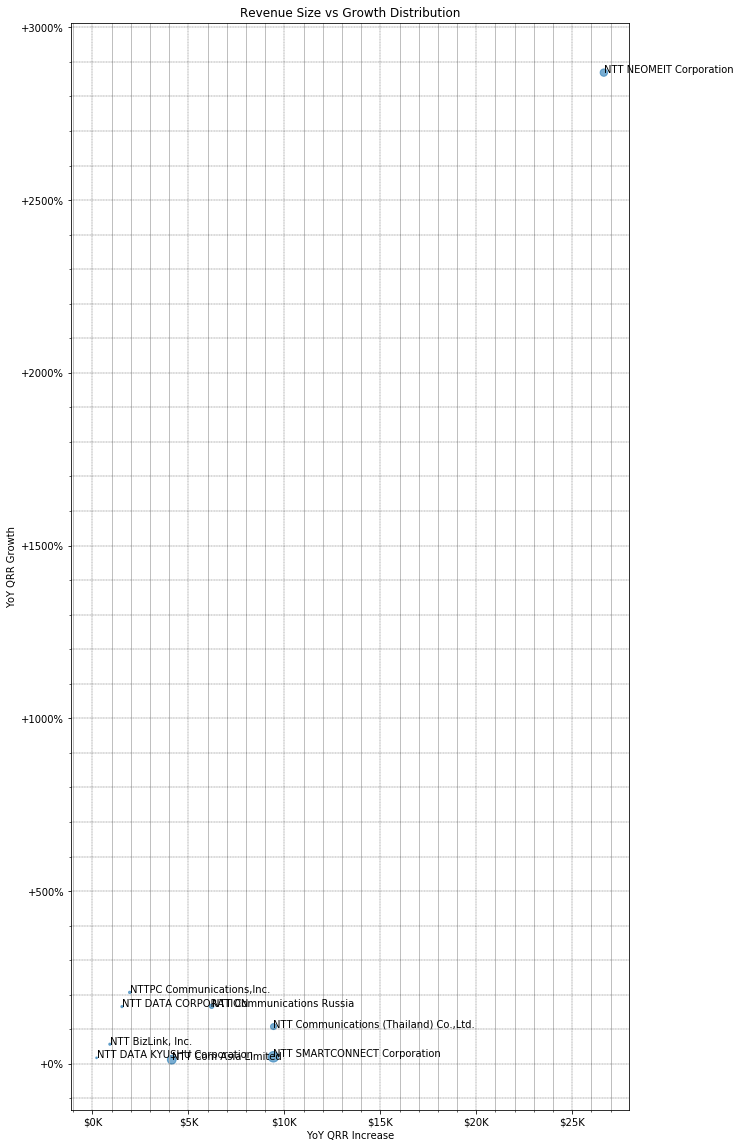

In [20]:
import size_vs_growth as sg

sg.plot(df[(df['Partner Group Name']=='NTT')],
    {'type':['NO_SLICE'],
     'time_frame': 'LAST_12',     
     'min_rev_growth':50,
    'show_sp_name':50})

### Revenue Size vs Growth

Softlayer Technologies, Inc.             United States    (AMER) $ 4,022,272 (2,715%)
Rackspace US, Inc                        United States    (AMER) $   524,254 (23%)
SAVVIS                                   United States    (AMER) $ 1,940,589 (242%)
OVH                                      France           (EMEA) $ 1,195,531 (133%)
Hewlett-Packard Enterprise Company       United States    (AMER) $ 1,053,026 (304%)
IBM                                      United States    (AMER) $ 1,069,586 (479%)
Canopy the Open Cloud Company            United Kingdom   (EMEA) $ 1,076,461 (1,019%)
Virtustream                              United States    (AMER) $   583,850 (201%)


RuntimeError: Locator attempting to generate 2852 ticks from -32.4 to 680.4000000000102: exceeds Locator.MAXTICKS

Rackspace US, Inc                        United States    (AMER) $   524,254 (23%)
SAVVIS                                   United States    (AMER) $ 1,940,589 (242%)
Hewlett-Packard Enterprise Company       United States    (AMER) $ 1,053,026 (304%)
IBM                                      United States    (AMER) $ 1,069,586 (479%)
Virtustream                              United States    (AMER) $   583,850 (201%)
Canopy the Open Cloud Company            United Kingdom   (EMEA) $ 1,076,461 (1,019%)
Canopy the Open Cloud Company            United Kingdom   (EMEA) $ 1,076,461 (1,019%)


RuntimeError: Locator attempting to generate 2871 ticks from -32.6 to 684.8000000000102: exceeds Locator.MAXTICKS

Internet Initiative Japan Inc.           Japan            (APAC) $   288,399 (33%)
NTT Communications Corporation           Japan            (APAC) $   100,874 (12%)
Fujitsu Limited (Japan)                  Japan            (APAC) $   410,105 (292%)
SoftBank Corp.                           Japan            (APAC) $   214,544 (126%)
NEC Corporation                          Japan            (APAC) $   214,523 (448%)
NS Solutions Corporation                 Japan            (APAC) $   132,893 (197%)


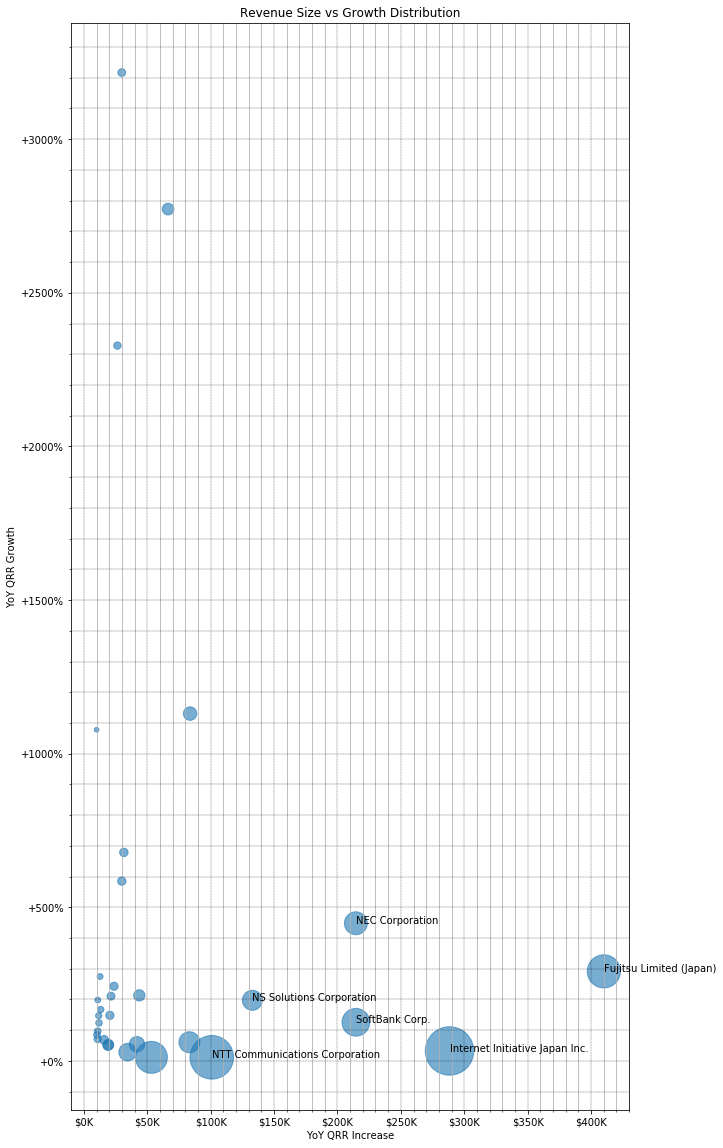

In [77]:
import size_vs_growth as sg

sg.plot(df,
     {'type':['GEO','RANK'],
      'time_frame': 'LAST_12',
      'min_rev_growth':10000,
      'show_sp_name':500000})
    
sg.plot(df[(df['Country']=='Japan')],
    {'type':['NO_SLICE'],
     'time_frame': 'LAST_12',     
     'min_rev_growth':10000,
    'show_sp_name':100000})

In [13]:
def print_mom_growth(s):
    for i,d in enumerate((s/s.shift(1)-1)*100):
        print('---') if s.index[i].month % 3 == 2 else None
        print('{:%b %Y} {:6.2f}%'.format(s.index[i],d))

def s_usage_point(df,g='ALL'):
    if g != 'ALL':
        df = df[df['Partner Group Name']==g]
    return df.groupby('Usage Period')['Usage Points'].sum()

# print_mom_growth(s_usage_point(df))
print('NTT')
print_mom_growth(s_usage_point(df,g='NTT'))
print('Fujitsu')
print_mom_growth(s_usage_point(df,g='Fujitsu'))




NTT
Jan 2016    nan%
---
Feb 2016   2.26%
Mar 2016   2.63%
Apr 2016   2.86%
---
May 2016   3.71%
Jun 2016   1.32%
Jul 2016   0.34%
---
Aug 2016   0.90%
Sep 2016   1.11%
Oct 2016   1.90%
---
Nov 2016   4.14%
Dec 2016  -0.06%
Jan 2017  -0.79%
---
Feb 2017  -3.12%
Mar 2017  -0.54%
Apr 2017  -0.68%
---
May 2017 -57.38%
Jun 2017 279.50%
Jul 2017 -38.77%
---
Aug 2017   0.41%
Sep 2017  12.89%
Oct 2017  -6.99%
---
Nov 2017  -4.41%
Dec 2017   4.08%
Fujitsu
Jan 2016    nan%
---
Feb 2016   0.61%
Mar 2016  -3.25%
Apr 2016 -10.59%
---
May 2016   8.66%
Jun 2016   3.01%
Jul 2016   4.19%
---
Aug 2016   0.58%
Sep 2016  11.83%
Oct 2016   0.21%
---
Nov 2016   2.00%
Dec 2016  -0.53%
Jan 2017   0.47%
---
Feb 2017   1.22%
Mar 2017   3.02%
Apr 2017  13.30%
---
May 2017  27.81%
Jun 2017 -34.84%
Jul 2017  12.20%
---
Aug 2017   6.93%
Sep 2017   0.06%
Oct 2017   0.74%
---
Nov 2017   2.13%
Dec 2017   0.76%


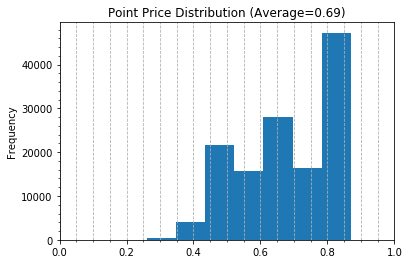

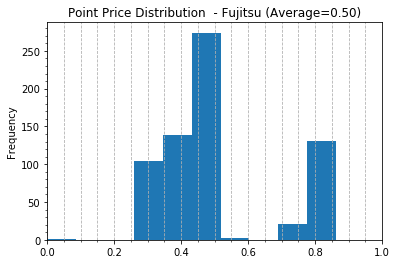

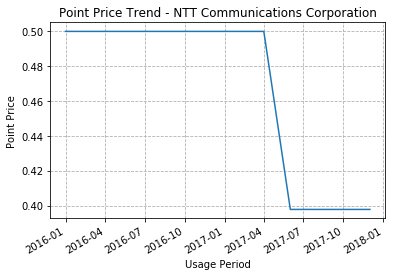

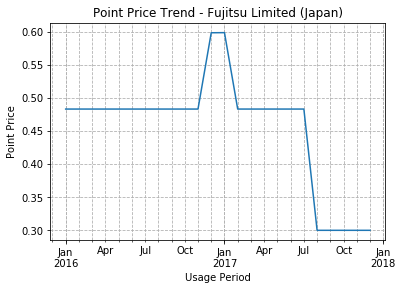

In [14]:
def plot_dist(d,caption=''):
    pp = d['Value (USD)']/d['Usage Points']

    pp.plot.hist(bins=10)
    plt.minorticks_on()
    plt.gca().xaxis.grid(True, which='both',linestyle='dashed')
    plt.xlim([0,1.0])
    plt.title("Point Price Distribution {}(Average={:.2f})".format(caption,pp.mean()))
    plt.show()

_df = df[df['Usage Points'] > 0]
_df_fujitsu = _df[_df['Partner Group Name']=='Fujitsu'].copy()

plot_dist(_df)
plot_dist(_df_fujitsu,caption=' - Fujitsu ')

def point_price_trend(sp):
    _df_sp = _df[_df['Service Provider']==sp].copy()
#    _df_sp = _df[_df['Partner Group Name']==sp].copy()
    _df_sp.loc[:,'Point Price'] = pd.Series(_df_sp['Value (USD)']/_df_sp['Usage Points'],index=_df_sp.index)

    _df_sp.groupby('Usage Period')['Point Price'].max().plot()
    plt.ylabel('Point Price')
    plt.gca().xaxis.grid(True, which='both',linestyle='dashed')
    plt.gca().yaxis.grid(True, which='both',linestyle='dashed')
    plt.title('Point Price Trend - {}'.format(sp))
    plt.show()
    

point_price_trend('NTT Communications Corporation')
point_price_trend('Fujitsu Limited (Japan)')





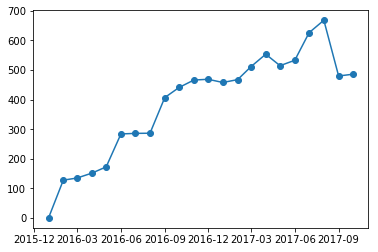

In [222]:
s_nifty = df[(df['Service Provider'].str.match(r'.*FUJITSU CLOUD.*')) | (df['Service Provider'].str.match(r'.*NIFTY.*'))].groupby('Usage Period')['Value (USD)'].sum()

start = s_nifty.values[0]

plt.plot(s_nifty.index,(s_nifty.values/start-1)*100,'o-',label='Nifty Revenue')
#format_trend_chart()
plt.show()

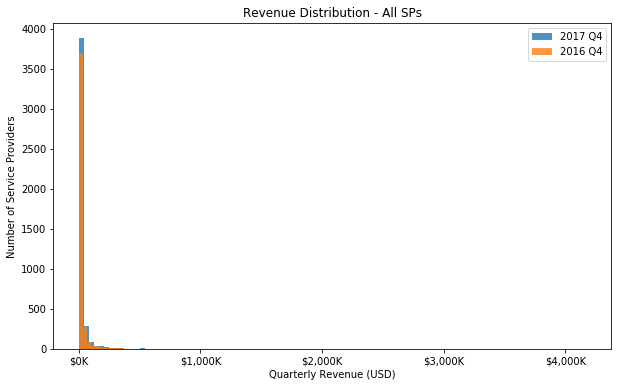

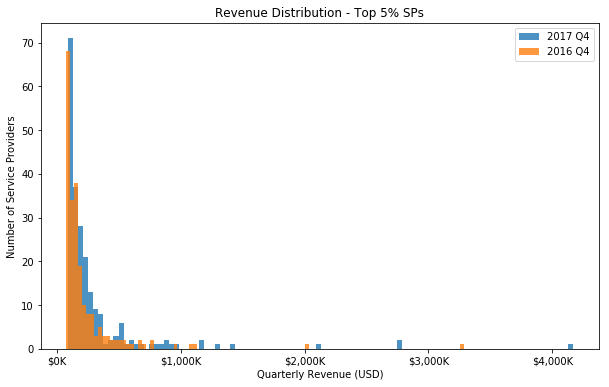

Total SP Count: 4399
Top 10 SPs Contribution: 16%
Softlayer Technologies, Inc.         4,170,429
Rackspace US, Inc                    2,765,411
SAVVIS                               2,742,297
OVH                                  2,095,654
Hewlett-Packard Enterprise Company   1,399,676
IBM                                  1,292,668
Canopy the Open Cloud Company        1,182,148
Internet Initiative Japan Inc.       1,175,218
NTT Communications Corporation       951,097
Tieto Corporation                    907,637


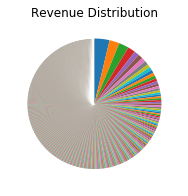

Total SP Count: 150
Top 10 SPs Contribution: 72%
Internet Initiative Japan Inc.       1,175,218
NTT Communications Corporation       951,097
Fujitsu Limited (Japan)              550,763
IDC Frontier Inc.                    510,839
FUJITSU CLOUD TECHNOLOGIES LIMITED   510,644
SoftBank Corp.                       385,005
NEC Corporation                      262,391
CTC/ITOCHU Techno-Solutions Corp     219,871
NS Solutions Corporation             200,217
SCSK Corporation                     155,193


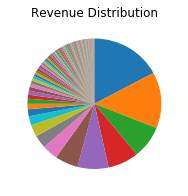

In [91]:
def df_quarter(df,Q):
    return df[(df['Usage Period'] >= Q[0]) & (df['Usage Period'] <= Q[2])]

def plot_hist(data_prev,data_last,cutoff,title):
    plt.hist(data_last[:int(len(data_last)*cutoff)],bins=100,alpha=.8,label='2017 Q4')
    plt.hist(data_prev[:int(len(data_last)*cutoff)],bins=100,alpha=.8,label='2016 Q4')

    plt.xlabel("Quarterly Revenue (USD)")
    plt.ylabel("Number of Service Providers")
    plt.title(title)
    ax = plt.gca()
    fig = plt.gcf()
    ax.set_xticklabels(['${:,.0f}K'.format(x/1000) for x in ax.get_xticks()])
    ax.legend(loc="upper right")
    fig.set_size_inches(10,6)
    plt.show()
    
df_last_q = df_quarter(df,END_QUARTER)
df_prev_q = df_quarter(df,YEAR_AGO_QUARTER)
data_last = df_last_q.groupby('Service Provider')['Value (USD)'].sum().sort_values(ascending=False)
data_prev = df_prev_q.groupby('Service Provider')['Value (USD)'].sum().sort_values(ascending=False)
    
plot_hist(data_prev,data_last,1.0,"Revenue Distribution - All SPs")
plot_hist(data_prev,data_last,0.05,"Revenue Distribution - Top 5% SPs")
    
def print_pie(df):
    total_last = df['Value (USD)'].sum()
    s_sp_val = df.groupby('Service Provider')['Value (USD)'].sum().sort_values(ascending=False)
    print("Total SP Count: {}".format(len(s_sp_val)))
    print("Top {} SPs Contribution: {:.0f}%".format(10,s_sp_val[:10].sum()/total_last*100))
    for sp,val in s_sp_val[:10].iteritems():
        print("{:36s} {:,.0f}".format(sp,val))
    
    plt.pie(s_sp_val.values,startangle=90,counterclock=False)
    plt.title('Revenue Distribution')
    plt.gcf().set_size_inches(3,3)
    plt.show()

print_pie(df_last_q)
print_pie(df_last_q[df_last_q['Country'] == 'Japan'])



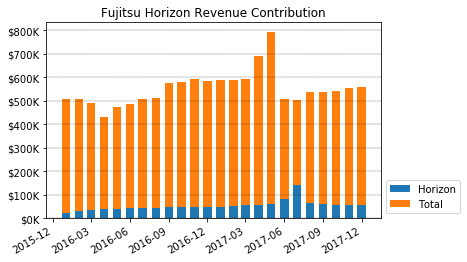

In [7]:
df_f = df[df['Partner Group Name']=='Fujitsu']
df_f_h = df_f[df_f['Product'].str.match(r'.*Horizon.*')]

total = df_f.groupby('Usage Period')['Value (USD)'].sum()
horizon = df_f_h.groupby('Usage Period')['Value (USD)'].sum()

plt.bar(total.index,horizon.values,20,label='Horizon')
plt.bar(total.index,total.values-horizon.values,20,label='Total',bottom=horizon.values)

format_trend_chart()
plt.title('Fujitsu Horizon Revenue Contribution')
plt.show()
    
#(df['Product Group']=='Horizon']


In [7]:
df_ops_map = pd.read_csv("../data/LeeMap.csv",encoding="ISO-8859-1")
df_ops_map = pd.read_csv("../data/AggregatorMap.csv",encoding="ISO-8859-1")

# df_group_map = pd.read_csv("../data/GroupMap.csv",encoding="ISO-8859-1")
df_last_q = df[(df['Usage Period']>=END_QUARTER[0]) & (df['Usage Period']<=END_QUARTER[2])]

ntt_groups = {
#    'ops': set(df_ops_map[df_ops_map['Global Ultimate Name match']=='NTT']['Reseller in Bookings']),
    'ops': set(df_ops_map['Partner Name']),
#    'entity_map': set(df_group_map[df_group_map['Partner Group Name']=='NTT']['Enduserorganization']),
    'usage_data': set(df_last_q[df_last_q['Partner Group Name']=='NTT']['Service Provider'])
}

fujitsu_groups = {
#    'ops': set(df_ops_map[df_ops_map['Global Ultimate Name match']=='Fujitsu']['Reseller in Bookings']),
#    'entity_map': set(df_group_map[df_group_map['Partner Group Name']=='NTT']['Enduserorganization']),
    'usage_data': set(df_last_q[df_last_q['Partner Group Name']=='Fujitsu']['Service Provider'])
}

from functools import reduce

total_rev = 0
for sp in sorted(reduce(lambda g0, g1: g0.union(g1), ntt_groups.values())):
    rev = df_last_q[df_last_q['Service Provider']==sp]['Value (USD)'].sum()
#    if rev == 0:
#        continue
    if sp in ntt_groups['usage_data'] and sp in ntt_groups['ops']:
        continue
    total_rev += rev
#    if sp in ntt_groups['ops']:
#        continue
       
    print('{:64s}: {} {} : {:10,.2f}'.format(sp,
                                        '*' if sp in ntt_groups['usage_data'] else ' ',
                                        '*' if sp in ntt_groups['ops'] else ' ',
                                         df_last_q[df_last_q['Service Provider']==sp]['Value (USD)'].sum()
                                    ))

print('{:,.2f}'.format(total_rev))
    
    


NTT Communications China Co., Ltd.                              :   * :   1,436.55
NTT DATA INC                                                    :   * :       0.00
NTT DATA ITALIA SPA                                             :   * :  38,757.20
NTT DATA Inc.                                                   :   * :       0.00
NTT EUROPE ONLINE GMBH                                          :   * :       0.00
NTT Europe Online GmbH                                          : *   :  10,991.29
NTT Indonesia                                                   : *   :   1,047.60
NTT Singapore PTE Ltd                                           :   * :       0.00
NTT Singapore Pte Ltd                                           : *   :  22,657.60
Shanghai NTT Telecommunications Engineering Co., Ltd.           : *   :     434.06
75,324.30


In [ ]:
# original list from Roger
ntt_groups = {
    'ops': {
        'Ingram Micro (China) Limited',
        'Insight (Software Spectrum)',
        'INSIGHT DIRECT USA, INC.',
        'Insight Techn. Solutions GmbH',
        'Networld Corp.',
        'NTT America',
        'NTT America, Inc. SME',
        'NTT Australia Pty Ltd',
        'NTT BizLink, Inc.',
        'NTT Com Asia Limited',
        'NTT Com ICT Solutions (Australia) Pty Ltd',
        'NTT Communications (Thailand) Co.,Ltd.',
        'NTT Communications China Co., Ltd.',
        'NTT Communications Corporation',
        'NTT Communications Corporation Australia Office',
        'NTT Communications Corporation Bangkok Office',
        'NTT Communications Corporation Barcelona Office',
        'NTT Communications Corporation Cyberjaya Office',
        'NTT Communications Corporation Frankfurt Office'
    },